<a href="https://colab.research.google.com/github/KhyatiGupta8/Text_Similarity/blob/main/TextSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Text_Similarity_Dataset.csv to Text_Similarity_Dataset (1).csv


In [3]:
import pandas as pd
df = pd.read_csv(r'Text_Similarity_Dataset.csv')
df.head()

,Unique_ID,text1,text2
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...
1,1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...
2,2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...
3,3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,4,be careful how you code a new european directi...,media gadgets get moving pocket-sized devices ...


In [4]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import warnings
warnings.filterwarnings('ignore')

In [5]:
A=df.text1
B=df.text2

In [6]:
A

0       savvy searchers fail to spot ads internet sear...
1       millions to miss out on the net by 2025  40% o...
2       young debut cut short by ginepri fifteen-year-...
3       diageo to buy us wine firm diageo  the world s...
4       be careful how you code a new european directi...
                              ...                        
4018    labour plans maternity pay rise maternity pay ...
4019    high fuel costs hit us airlines two of the lar...
4020    britons growing  digitally obese  gadget lover...
4021    holmes is hit by hamstring injury kelly holmes...
4022    nuclear dumpsite  plan attacked plans to allow...
Name: text1, Length: 4023, dtype: object

In [7]:
B

0       newcastle 2-1 bolton kieron dyer smashed home ...
1       nasdaq planning $100m share sale the owner of ...
2       ruddock backs yapp s credentials wales coach m...
3       mci shares climb on takeover bid shares in us ...
4       media gadgets get moving pocket-sized devices ...
                              ...                        
4018    no seasonal lift for house market a swathe of ...
4019    new media battle for bafta awards the bbc lead...
4020    film star fox behind theatre bid leading actor...
4021    tsunami  to hit sri lanka banks  sri lanka s b...
4022    x factor show gets second series tv talent sho...
Name: text2, Length: 4023, dtype: object

In [8]:

import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [9]:
similarity_score=[]
for i in range(len(A)):

  x=A[i]
  y=B[i]
  #tokenization
  x_list=word_tokenize(x)
  y_list=word_tokenize(y)
  #removing stopwords from above lists
  sw=stopwords.words('english')
  l1=[]
  l2=[]
  x_set={w for w in x_list if w not in sw}
  y_set={w for w in y_list if w not in sw}
  #words matching in sets
  rvector=x_set.union(y_set)

  l=[]
  for w in rvector:
    if w in x_set:
      #creating vector 
      l1.append(1)
    else:
      l1.append(0)
    if w in y_set:
      #creating array
      l2.append(1)
    else:
      l2.append(0)
  c=0
  #using cosine formula
  for i in range(len(rvector)):
    c+=(l1[i]*l2[i])
  cosine=(c/float((sum(l1)*sum(l2))**0.5))
  #print(cosine)
  similarity_score.append(cosine)

In [10]:
similarity_score

[0.07711832651396772,
 0.06384423980690615,
 0.07625544299269366,
 0.13927795270400412,
 0.13752917498513156,
 0.1154469667530522,
 0.07539938625149387,
 0.1387654205543684,
 0.09646651336220544,
 0.18758061837103224,
 0.07167788657203636,
 0.06155870112510924,
 0.11375557435721576,
 0.15343693079882814,
 0.11700299197190683,
 0.06317539727139919,
 0.0746726247841881,
 0.07801047082233378,
 0.17522951277825916,
 0.0876619818920292,
 0.09855941961400198,
 0.07903718467733489,
 0.12309149097933274,
 0.06620262530895386,
 0.09842273252251338,
 0.10104389907637111,
 0.13658959117703826,
 0.1712541109125299,
 0.04504870144710026,
 0.10111083140389397,
 0.05865464152543313,
 0.04997501873438866,
 0.16417637271823154,
 0.09899069531194046,
 0.047222506888076415,
 0.07259540086406278,
 0.11044204887501097,
 0.08446557856466828,
 0.08018753738744802,
 0.061977978680091216,
 0.07352146220938077,
 0.07795549216496239,
 0.10302984701831439,
 0.10563409385880056,
 0.10087498789213642,
 0.1829258462

In [11]:
df['similarity_score']=similarity_score

In [12]:
df

,Unique_ID,text1,text2,similarity_score
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...,0.077118
1,1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...,0.063844
2,2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...,0.076255
3,3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...,0.139278
4,4,be careful how you code a new european directi...,media gadgets get moving pocket-sized devices ...,0.137529
...,...,...,...,...
4018,4018,labour plans maternity pay rise maternity pay ...,no seasonal lift for house market a swathe of ...,0.088521
4019,4019,high fuel costs hit us airlines two of the lar...,new media battle for bafta awards the bbc lead...,0.089592
4020,4020,britons growing digitally obese gadget lover...,film star fox behind theatre bid leading actor...,0.114160
4021,4021,holmes is hit by hamstring injury kelly holmes...,tsunami to hit sri lanka banks sri lanka s b...,0.057153


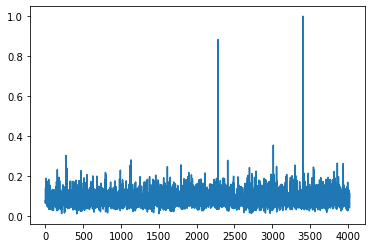

In [13]:
 import matplotlib.pyplot as plt
 plt.plot(range(0,4023),df.similarity_score)
 plt.show()

In [14]:
df1=df[['Unique_ID','similarity_score']]
df1.head()

,Unique_ID,similarity_score
0,0,0.077118
1,1,0.063844
2,2,0.076255
3,3,0.139278
4,4,0.137529


top three similarity text in the dataframe

In [15]:
df1.sort_values(by='similarity_score',ascending=False).head(3).set_index('Unique_ID')

,similarity_score
Unique_ID,
3403,1.000000
2284,0.883515
3013,0.354204


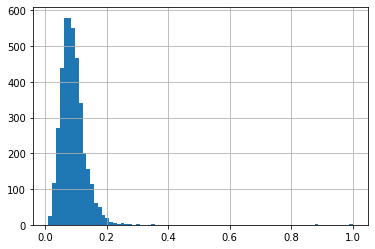

In [16]:
df1['similarity_score'].hist(bins=80)

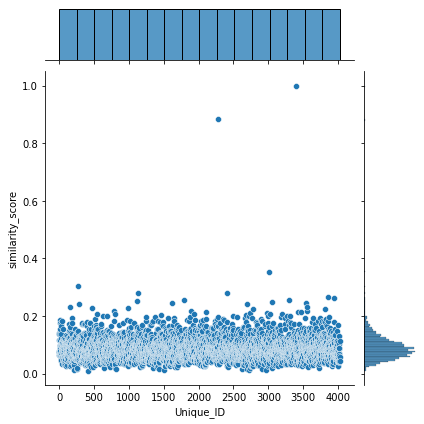

In [17]:
import seaborn as sn
sn.jointplot(df1['Unique_ID'],df1['similarity_score'])

In [19]:
df1.to_csv('similarityscore.csv')